# Step1: Scraping @elonmusk tweets between Mar.6-Jun.22

In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_colwidth", 200)

/Users/lisakim/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# codes from: https://betterprogramming.pub/how-to-scrape-tweets-with-snscrape-90124ed006af

import snscrape.modules.twitter as sntwitter

# Creating list to append tweet data to
tweets_list = []

# Using TwitterSearchScraper to scrape data and append tweets to list
# Scraping 800 most recent tweets ending on June 22nd 10:30AM EST
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:elonmusk').get_items()):
    if i>800:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.retweetCount, tweet.likeCount, tweet.user.username])
    
# Creating a dataframe from the tweets list above 
df_ElonMuskTweet = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Retweets', 'Likes', 'Username'])

In [3]:
df_ElonMuskTweet.head(1)

,Datetime,Tweet Id,Text,Retweets,Likes,Username
0,2021-06-22 05:59:30+00:00,1407216656615579663,@JRossNicoll This is an important improvement,2709,16297,elonmusk


In [4]:
df_ElonMuskTweet.to_csv('ElonMuskTweet.csv', index=False)

# Step2: Cleaning dataframe

In [5]:
ElonMuskCrypto = df_ElonMuskTweet[df_ElonMuskTweet['Text'].str.contains('Bitcoin', regex=False) | \
                                   df_ElonMuskTweet['Text'].str.contains('Doge', regex=False) | \
                                   df_ElonMuskTweet['Text'].str.contains('crypto', regex=False) | \
                                   df_ElonMuskTweet['Text'].str.contains('Shiba', regex=False) | \
                                   df_ElonMuskTweet['Text'].str.contains('Crypto', regex=False) | \
                                   df_ElonMuskTweet['Text'].str.contains('coin', regex=False)]
ElonMuskCrypto

,Datetime,Tweet Id,Text,Retweets,Likes,Username
22,2021-06-17 11:07:28+00:00,1405482221666852871,@BitcoinMagazine @jespow Based on what data?,914,10745,elonmusk
54,2021-06-13 17:42:54+00:00,1404132183254523905,@Cointelegraph This is inaccurate. Tesla only sold ~10% of holdings to confirm BTC could be liquidated easily without moving market.\n\nWhen there’s confirmation of reasonable (~50%) clean energy ...,11083,55230,elonmusk
112,2021-06-05 08:21:59+00:00,1401091921746006017,@lexfridman @VitalikButerin @ethereum @Bitcoin @dogecoin @ShibainuCoin @IOHK_Charles @Cardano @chainlink @0xPolygon I pretty much agree with Vitalik,3361,24912,elonmusk
113,2021-06-05 07:41:30+00:00,1401081730832945154,@CryptoWhale 👆,886,11309,elonmusk
117,2021-06-04 05:27:36+00:00,1400685648001081352,@ItsDogeCoin @RTHowell Haf yu sin mi danz?,940,10351,elonmusk
120,2021-06-04 04:22:44+00:00,1400669324457693186,@CryptoWhale Great thread 🤣,986,11418,elonmusk
123,2021-06-04 03:45:43+00:00,1400660008732348419,@coinbase Nice,3685,28788,elonmusk
126,2021-06-04 01:54:58+00:00,1400632134805639169,@JRNYcrypto Needs laser eyes too,949,10016,elonmusk
127,2021-06-04 01:16:37+00:00,1400622483989008384,@JRNYcrypto 🤣🤣,814,18068,elonmusk
128,2021-06-04 01:07:04+00:00,1400620080090730501,#Bitcoin 💔 https://t.co/lNnEfMdtJf,22632,217618,elonmusk


In [6]:
ElonMuskCrypto.shape

(59, 6)

In [7]:
ElonMuskCrypto['Datetime_date'] = ElonMuskCrypto['Datetime'].dt.date

<ipython-input-7-f4a9a537d922>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ElonMuskCrypto['Datetime_date'] = ElonMuskCrypto['Datetime'].dt.date


In [8]:
# organizing by date from Mar.6 onwards
ElonMuskCrypto2 = ElonMuskCrypto.sort_values(by=['Datetime_date'], ascending=True)
ElonMuskCrypto2

,Datetime,Tweet Id,Text,Retweets,Likes,Username,Datetime_date
775,2021-03-06 04:40:30+00:00,1368058884837928970,Doge spelled backwards is Egod,38478,407964,elonmusk,2021-03-06
735,2021-03-12 18:58:22+00:00,1370449101402353669,BTC (Bitcoin) is an anagram of\nTBC(The Boring Company)\nWhat a coincidence!,17548,243509,elonmusk,2021-03-12
725,2021-03-13 23:46:16+00:00,1370883943143251968,"Origin of Doge Day Afternoon:\nThe ancient Romans sacrificed a Dogecoin at the beginning of the Doge Days to appease the rage of Sirius, believing that the star was the cause of the hot, sultry we...",7832,76552,elonmusk,2021-03-13
726,2021-03-13 23:40:41+00:00,1370882536101056523,Doge day afternoon,18708,175357,elonmusk,2021-03-13
721,2021-03-14 03:54:54+00:00,1370946514974031872,I’m getting a Shiba Inu #resistanceisfutile,20891,249582,elonmusk,2021-03-14
707,2021-03-15 23:11:50+00:00,1371600053039722500,@beeple 420M Doge,5078,79901,elonmusk,2021-03-15
699,2021-03-18 21:17:16+00:00,1372658385896738817,@lexfridman Sometimes it’s about Doge,3565,49282,elonmusk,2021-03-18
655,2021-03-24 07:02:40+00:00,1374617643446063105,You can now buy a Tesla with Bitcoin,113596,894907,elonmusk,2021-03-24
654,2021-03-24 07:09:34+00:00,1374619379929772034,"Tesla is using only internal &amp; open source software &amp; operates Bitcoin nodes directly.\n\nBitcoin paid to Tesla will be retained as Bitcoin, not converted to fiat currency.",20174,178892,elonmusk,2021-03-24
653,2021-03-24 07:10:43+00:00,1374619672973221892,Pay by Bitcoin capability available outside US later this year,9171,141285,elonmusk,2021-03-24


In [9]:
ElonMuskCrypto2.to_csv('ElonMusk_strContains_Crypto.csv', index=False)

# Step 3: Further cleaning dataframe

In [10]:
ElonMuskCrypto4= ElonMuskCrypto2.rename(columns={"Datetime_date": "Date"})

In [11]:
ElonMuskCrypto4.reset_index(drop=True, inplace=True)
ElonMuskCrypto4.Date = ElonMuskCrypto4.Date.astype(str)

In [12]:
ElonMuskCrypto4.Date = ElonMuskCrypto4.Date.astype(str)

# Step 4: Reading Tesla stock price, volume

In [13]:
# downloaded csv from MarketWatch: 
# https://www.marketwatch.com/investing/stock/tsla/download-data?startDate=3/5/2021&endDate=6/22/2021

df_Tesla = pd.read_csv("TeslaStock_Mar5toJun21.csv", parse_dates=['Date'])
# parse_dates changes the Date column to YYYY-MM-DD

In [14]:
df_Tesla.head(1)

,Date,Open,High,Low,Close,Volume,volume%change_dayToDay
0,2021-03-05,626.06,627.84,539.49,597.95,89396461.0,NaN


In [15]:
df_Tesla = df_Tesla.astype(str)

In [16]:
df_Tesla.Volume = df_Tesla.Volume.str.replace(',','')

# Step 5: Merging df_Tesla and ElonMuskCrypto4

In [17]:
result2 = pd.merge(ElonMuskCrypto4, df_Tesla, on="Date", how='right')

In [18]:
result2.head()

,Datetime,Tweet Id,Text,Retweets,Likes,Username,Date,Open,High,Low,Close,Volume,volume%change_dayToDay
0,NaT,NaN,NaN,NaN,NaN,NaN,2021-03-05,626.06,627.84,539.49,597.95,89396461.0,nan
1,NaT,NaN,NaN,NaN,NaN,NaN,2021-03-08,600.55,620.13,558.79,563.0,51786961.0,-0.42070457352892293
2,NaT,NaN,NaN,NaN,NaN,NaN,2021-03-09,608.18,678.09,595.21,673.58,67523328.0,0.3038673576539854
3,NaT,NaN,NaN,NaN,NaN,NaN,2021-03-10,700.3,717.85,655.06,668.06,60605672.0,-0.10244838643024234
4,NaT,NaN,NaN,NaN,NaN,NaN,2021-03-11,699.4,702.5,677.18,699.6,36253887.0,-0.4018070288866692


In [19]:
result2 = result2.sort_values(by=['Date'], ascending= True)

In [20]:
result2.Close = result2.Close.astype(float)

In [21]:
# result2.Volume = result2.Volume.str.replace(',','')
result2.Volume = result2.Volume.astype(float)

## getting percent change in stock price, volume

In [22]:
result2['stock%change_dayToDay'] = result2.Close.pct_change()
result2['volume%change_dayToDay'] = result2.Volume.pct_change()

In [23]:
result2.head()

,Datetime,Tweet Id,Text,Retweets,Likes,Username,Date,Open,High,Low,Close,Volume,volume%change_dayToDay,stock%change_dayToDay
0,NaT,NaN,NaN,NaN,NaN,NaN,2021-03-05,626.06,627.84,539.49,597.95,89396461.0,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,2021-03-08,600.55,620.13,558.79,563.00,51786961.0,-0.420705,-0.058450
2,NaT,NaN,NaN,NaN,NaN,NaN,2021-03-09,608.18,678.09,595.21,673.58,67523328.0,0.303867,0.196412
3,NaT,NaN,NaN,NaN,NaN,NaN,2021-03-10,700.3,717.85,655.06,668.06,60605672.0,-0.102448,-0.008195
4,NaT,NaN,NaN,NaN,NaN,NaN,2021-03-11,699.4,702.5,677.18,699.60,36253887.0,-0.401807,0.047211


In [24]:
result2.to_csv('Crypto_Telsa.csv', index=False)

In [25]:
# sorting by Likes
result3 = result2.sort_values(by=['Likes'], ascending= False)

## getting average of % change in price, volumn

In [26]:
result2['stock%change_dayToDay'].mean()

0.0009640525533491678

In [27]:
result2['volume%change_dayToDay'].mean()

0.00944433001254471

# Step 6: Mapping

In [28]:
df_Tesla.head()

,Date,Open,High,Low,Close,Volume,volume%change_dayToDay
0,2021-03-05,626.06,627.84,539.49,597.95,89396461.0,nan
1,2021-03-08,600.55,620.13,558.79,563.0,51786961.0,-0.42070457352892293
2,2021-03-09,608.18,678.09,595.21,673.58,67523328.0,0.3038673576539854
3,2021-03-10,700.3,717.85,655.06,668.06,60605672.0,-0.10244838643024234
4,2021-03-11,699.4,702.5,677.18,699.6,36253887.0,-0.4018070288866692


In [29]:
df_Tesla = df_Tesla.sort_values(by=['Date'], ascending= True)

In [30]:
df_Tesla.Volume = df_Tesla.Volume.astype(str).astype(float)

In [31]:
df_Tesla['volume%change_dayToDay'] = df_Tesla.Volume.pct_change()

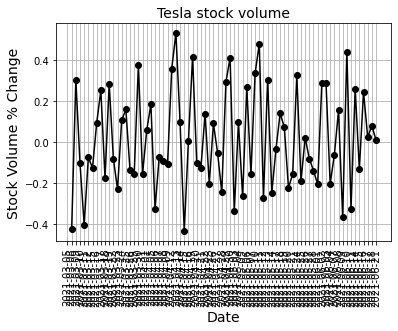

In [32]:
import matplotlib.pyplot as plt

plt.title('Tesla stock volume', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Volume % Change', fontsize=14)
plt.grid(True)
plt.rcParams['figure.figsize'] = [20, 8]
plt.plot(df_Tesla.Date, df_Tesla['volume%change_dayToDay'], color='black', marker='o')
plt.xticks(df_Tesla.Date,rotation=90)
plt.show()

In [33]:
df_Tesla.to_csv('TeslaStock_Mar5toJun21_new.csv', index=False)